# 🎮 Video Game Sales Dataset — Exploratory Data Analysis (EDA)

## 🔍 0. Preliminary Steps

Before starting the analysis, let’s perform basic EDA steps to understand and clean the dataset.

### ✅ Instructions:
1. **Import required libraries:** 
   `pandas`, `numpy`, `matplotlib`, `seaborn`, `plotly` (optional, for interactive visualizations)

2. **Load the dataset:** 
   Read the CSV file (`vgsales.csv`) and display the first few rows.

3. **Check dataset information:** 
   Use `.info()` and `.describe()` to examine data types and basic statistics.

4. **Identify missing values:** 
   Use `.isnull().sum()` to check for missing values and visualize them if necessary.

5. **Check for duplicate rows:** 
   Remove duplicate records using `.drop_duplicates()`.

6. **Data type adjustments:** 
   Ensure numerical and categorical columns have the correct data types (e.g., `Year` should be an integer).

7. **Exploratory summary:** 
   Examine the number of unique values in categorical columns such as `Genre`, `Platform`, and `Publisher`.

8. **Outlier Analysis:** 
   Detect outliers using box plots and the IQR method.


In [ ]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the data

In [52]:
df = pd.read_csv("vgsales.csv")
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [19]:
df.shape

(16598, 11)

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [22]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [24]:
df_copy = df.copy()

In [27]:
df_copy['Year'] = df_copy['Year'].astype('Int64')
df_copy.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [31]:
# show the list of unique values in the 'Platform' column
df_copy.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [36]:
df.groupby("Name")["Year"].nunique().sort_values(ascending=False)


Name
SimCity 2000                                  5
Monopoly                                      5
Steins;Gate                                   4
Terraria                                      4
MotoGP                                        4
                                             ..
Alone in the Dark: The New Nightmare          0
The Daring Game for Girls                     0
Writing and Speaking Beautiful Japanese DS    0
All-Star Baseball 2005                        0
Silent Hill: Homecoming                       0
Name: Year, Length: 11493, dtype: int64

In [35]:
df_copy['Publisher'].value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [38]:
df.groupby(["Name", "Publisher"])["Year"].nunique().value_counts()


Year
1    11175
2      497
0      163
3       24
Name: count, dtype: int64

### Fill 'Year' null values

In [48]:
df_copy["Year"] = df_copy["Year"].fillna(
    df_copy.groupby("Platform")["Year"].transform("median")
)

df_copy.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [49]:
most_common_publisher = df_copy["Publisher"].mode()[0]
df_copy["Publisher"] = df_copy["Publisher"].fillna(most_common_publisher)
df_copy.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# 1. 🎮 Which game genre has the most games produced?

In [58]:
most_produced_genre = df_copy["Genre"].value_counts().idxmax()
count = df_copy["Genre"].value_counts().max()

print(f"The genre with the most games produced is {most_produced_genre} and it produced {count} games.")


The genre with the most games produced is Action and it produced 3316 games.


## 2. 📆 Which year had the highest number of game releases?

In [60]:
most_active_year = df_copy["Year"].value_counts().idxmax()
count = df_copy["Year"].value_counts().max()

print(f"The year with the highest number of game releases is {most_active_year} with {count} games.")


The year with the highest number of game releases is 2009 with 1474 games.


## 3. 🏷️ Top 5 years with the highest number of game releases by genre

In [55]:
year_genre_counts = df_copy.groupby(["Year", "Genre"])["Name"].count()
top5_year_genre = year_genre_counts.sort_values(ascending=False).head(5)
print(top5_year_genre)

Year  Genre 
2009  Action    276
2012  Action    273
2015  Action    255
2011  Action    250
2010  Action    230
Name: Name, dtype: int64


## 4. 💰 Which year had the highest global sales?

In [59]:
top_year = df_copy.groupby("Year")["Global_Sales"].sum().idxmax()
top_sales = df_copy.groupby("Year")["Global_Sales"].sum().max()

print(f"The year with the highest global sales is {top_year} with the sales of ${top_sales:.2f} million.")


The year with the highest global sales is 2008 with the sales of $689.86 million.


## 5. 🕹️ Which game genre was released the most in a single year?

In [61]:
year_genre_counts = df_copy.groupby(["Year", "Genre"])["Name"].count()

max_year_genre = year_genre_counts.idxmax()
max_count = year_genre_counts.max()

print(f"The genre released the most in a single year is {max_year_genre[1]} in {max_year_genre[0]} with {max_count} games.")

The genre released the most in a single year is Action in 2009 with 276 games.


## 6. 💸 Which game genre had the highest sales in a single year?

In [ ]:
top_year_genre = df_copy.groupby(["Year", "Genre"])["Global_Sales"].sum().idxmax()
top_sales = df_copy.groupby(["Year", "Genre"])["Global_Sales"].sum().max()

print(f"The genre with the highest global sales in a single year is {top_year_genre[1]} in {top_year_genre[0]} (${top_sales:.2f} million).")

The genre with the highest global sales in a single year is Action in 2008 ($143.45 million).


## 7. 🌍 Which game genre has the highest global sales revenue?

In [65]:
top_genre = df_copy.groupby("Genre")["Global_Sales"].sum().idxmax()
top_sales = df_copy.groupby("Genre")["Global_Sales"].sum().max()

print(f"The genre with the highest global sales revenue is {top_genre} (${top_sales:.2f} million).")

The genre with the highest global sales revenue is Action ($1751.18 million).


## 8. 🎮 Which platform has the highest global sales revenue?

In [66]:
top_platform = df_copy.groupby("Platform")["Global_Sales"].sum().idxmax()
top_sales = df_copy.groupby("Platform")["Global_Sales"].sum().max()

print(f"The platform with the highest global sales revenue is {top_platform} (${top_sales:.2f} million).")

The platform with the highest global sales revenue is PS2 ($1255.64 million).


## 9. 🏆 Which individual game is the best-seller globally?

In [67]:
best_seller = df_copy.loc[df_copy["Global_Sales"].idxmax()]

print(f"The best-selling game globally is '{best_seller['Name']}' "
      f"on {best_seller['Platform']} ({best_seller['Global_Sales']:.2f} million copies).")

The best-selling game globally is 'Wii Sports' on Wii (82.74 million copies).


## 10. 📊 Sales comparison by genre

In [68]:
genre_sales = df_copy.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)
print(genre_sales)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


In [69]:
region_sales = df_copy.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
print(region_sales)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          877.83    525.00    159.95       187.38
Adventure       105.80     64.13     52.07        16.81
Fighting        223.59    101.32     87.35        36.68
Misc            410.24    215.98    107.76        75.32
Platform        447.05    201.63    130.77        51.59
Puzzle          123.78     50.78     57.31        12.55
Racing          359.42    238.39     56.69        77.27
Role-Playing    327.28    188.06    352.31        59.61
Shooter         582.60    313.27     38.28       102.69
Simulation      183.31    113.38     63.70        31.52
Sports          683.35    376.85    135.37       134.97
Strategy         68.70     45.34     49.46        11.36


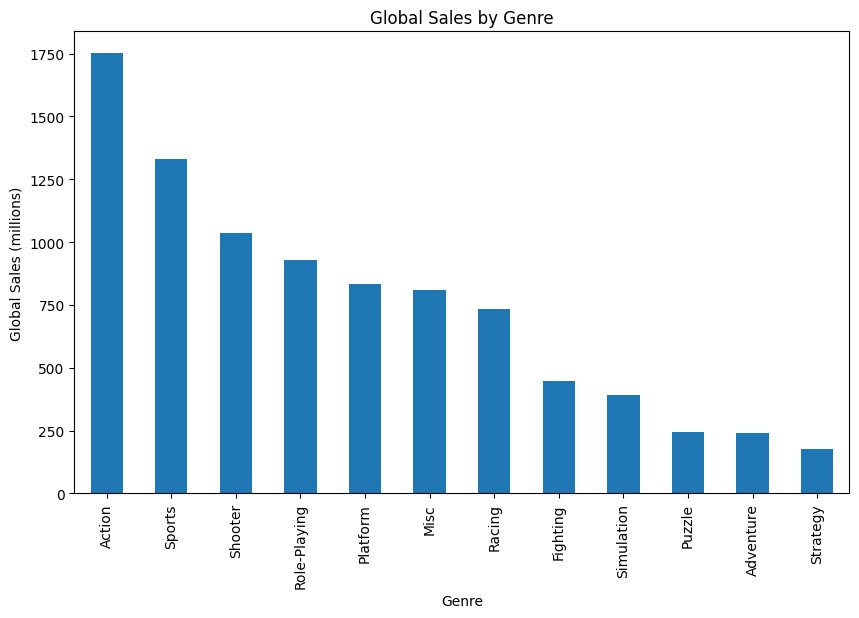

In [70]:
genre_sales.plot(kind="bar", figsize=(10,6), title="Global Sales by Genre", ylabel="Global Sales (millions)")
plt.show()

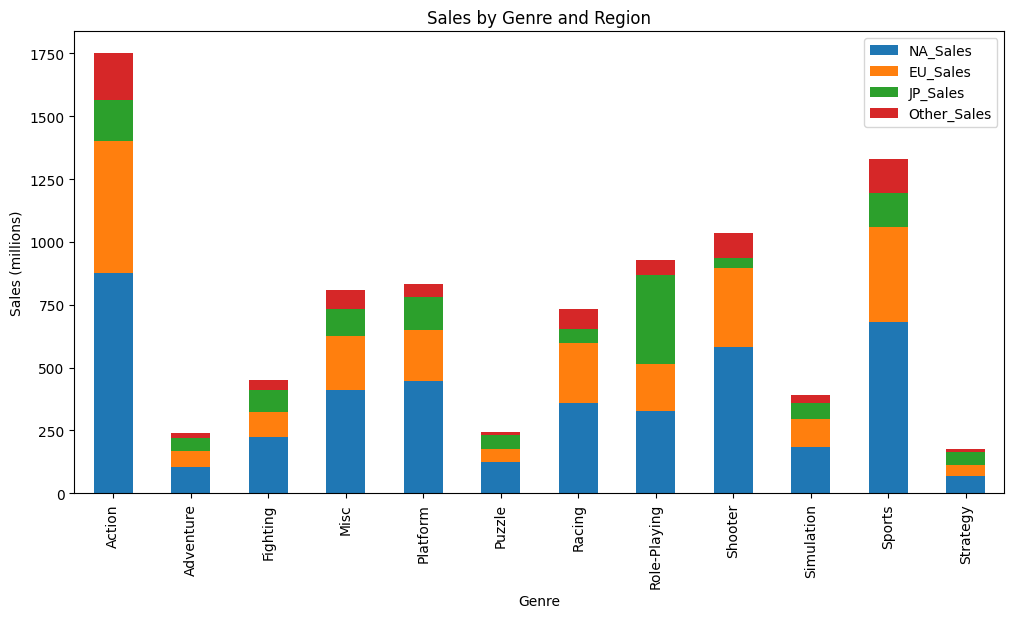

In [71]:
region_sales.plot(kind="bar", stacked=True, figsize=(12,6), title="Sales by Genre and Region", ylabel="Sales (millions)")
plt.show()

## 11. 💿 Sales comparison by platform

In [72]:
platform_sales = df_copy.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)
print(platform_sales)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64


In [73]:
region_sales_platform = df_copy.groupby("Platform")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
print(region_sales_platform)

          NA_Sales  EU_Sales  JP_Sales  Other_Sales
Platform                                           
2600         90.60      5.47      0.00         0.91
3DO           0.00      0.00      0.10         0.00
3DS          78.87     58.52     97.35        12.63
DC            5.43      1.69      8.56         0.27
DS          390.71    194.65    175.57        60.53
GB          114.32     47.82     85.12         8.20
GBA         187.54     75.25     47.33         7.73
GC          133.46     38.71     21.58         5.18
GEN          19.27      5.52      2.67         0.89
GG            0.00      0.00      0.04         0.00
N64         139.02     41.06     34.22         4.38
NES         125.94     21.15     98.65         5.31
NG            0.00      0.00      1.44         0.00
PC           93.28    139.68      0.17        24.86
PCFX          0.00      0.00      0.03         0.00
PS          336.51    213.60    139.82        40.91
PS2         583.84    339.29    139.20       193.44
PS3         

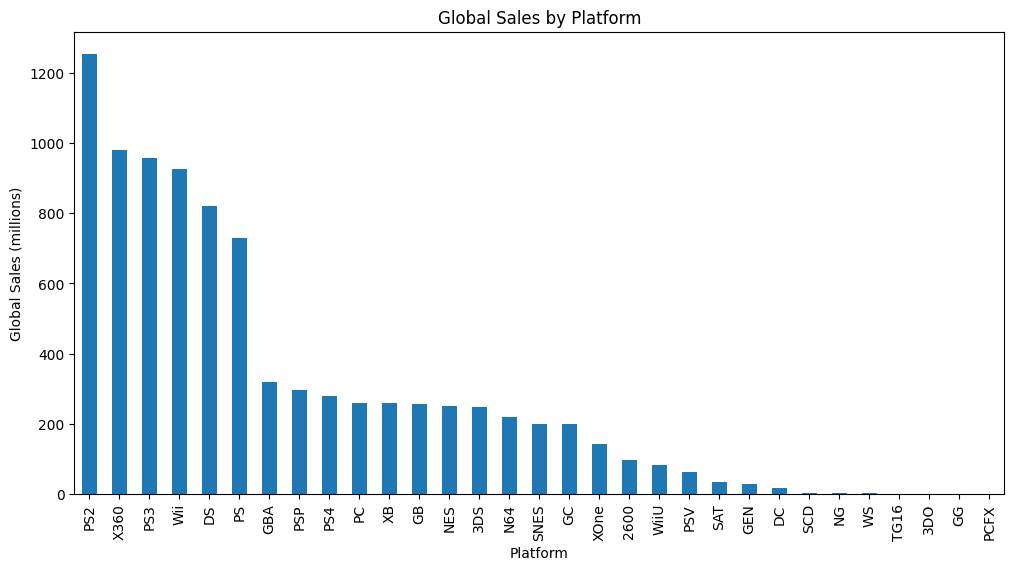

In [74]:
platform_sales.plot(kind="bar", figsize=(12,6), title="Global Sales by Platform", ylabel="Global Sales (millions)")
plt.show()

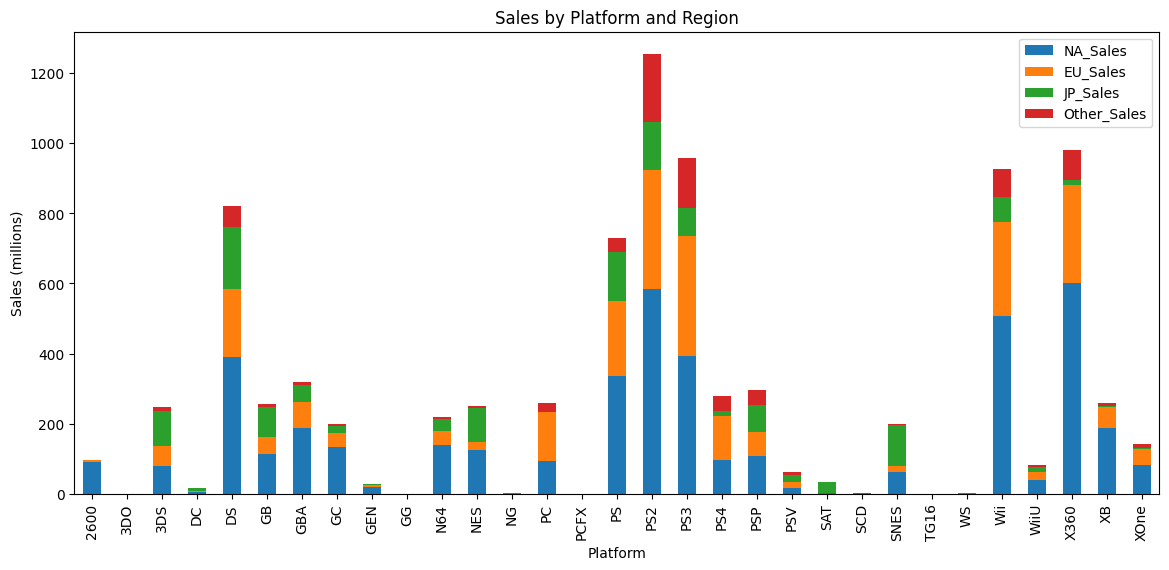

In [75]:
region_sales_platform.plot(kind="bar", stacked=True, figsize=(14,6), title="Sales by Platform and Region", ylabel="Sales (millions)")
plt.show()

## 12. 🏢 Top 20 publishers with the most game releases

In [ ]:
publisher_counts = df_copy["Publisher"].value_counts()
top20_publishers = publisher_counts.head(20)

print(top20_publishers)

Publisher
Electronic Arts                           1409
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Name: count, dtype: int64


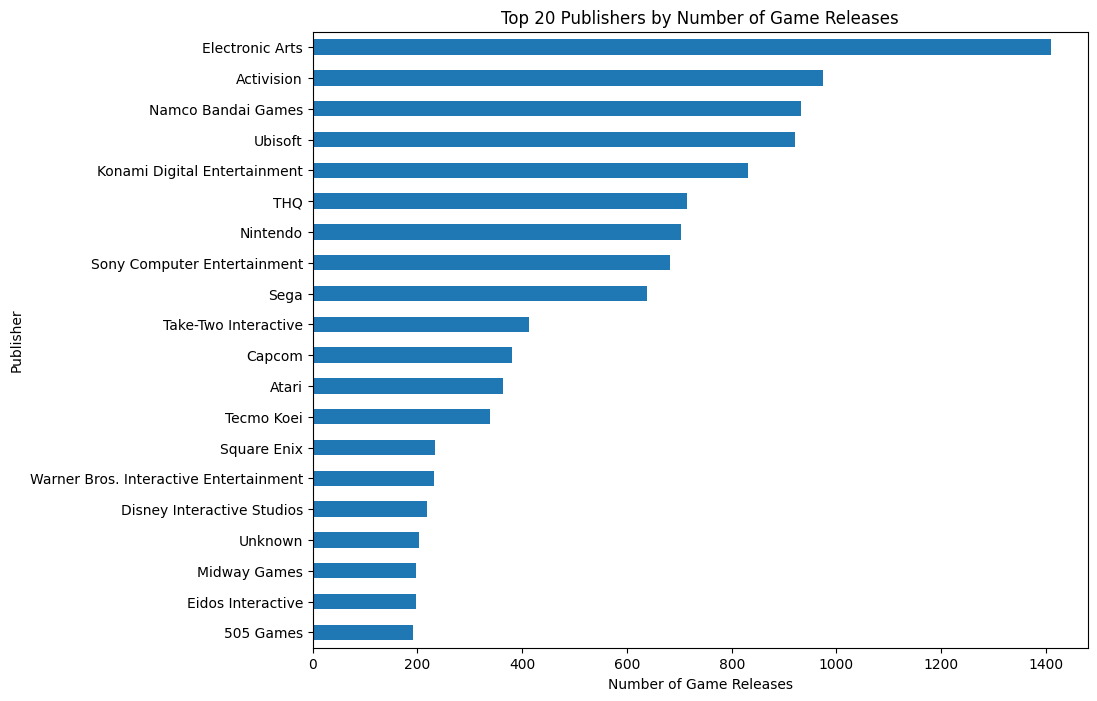

In [77]:
top20_publishers.plot(kind="barh", figsize=(10,8), title="Top 20 Publishers by Number of Game Releases")
plt.gca().invert_yaxis()  # largest on top
plt.xlabel("Number of Game Releases")
plt.show()

## 13. 🌐 Highest global sales by publisher

In [78]:
publisher_sales = df_copy.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)

top_publisher = publisher_sales.idxmax()
top_sales = publisher_sales.max()

print(f"The publisher with the highest global sales is {top_publisher} (${top_sales:.2f} million).")

The publisher with the highest global sales is Nintendo ($1786.56 million).


## 14. 📅 Publishers with the most game releases by year

In [79]:
year_publisher_counts = df_copy.groupby(["Year", "Publisher"])["Name"].count()

year_publisher_counts = year_publisher_counts.reset_index(name="Game_Count")
top_publishers_per_year = year_publisher_counts.loc[year_publisher_counts.groupby("Year")["Game_Count"].idxmax()]

top_publishers_per_year.sort_values("Year")

,Year,Publisher,Game_Count
0,1980,Activision,5
4,1981,Atari,11
19,1982,Atari,26
37,1983,Atari,6
43,1984,Nintendo,9
49,1985,Nintendo,7
55,1986,Nintendo,6
57,1987,Atari,4
69,1988,Nintendo,6
77,1989,Nintendo,9


## 15. 🌎 Total revenue analysis by region

In [80]:
region_sales = df_copy[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

print(region_sales)

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64


In [81]:
region_percent = region_sales / region_sales.sum() * 100
print(region_percent)

NA_Sales       49.271242
EU_Sales       27.301155
JP_Sales       14.480055
Other_Sales     8.947548
dtype: float64


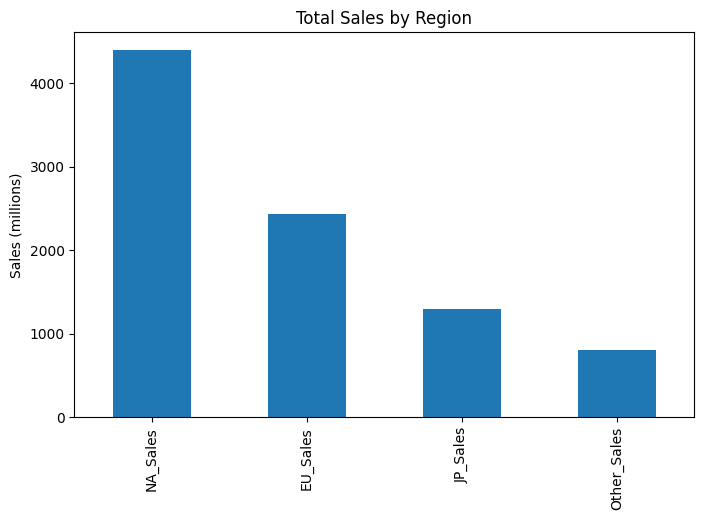

In [82]:
import matplotlib.pyplot as plt

region_sales.plot(kind="bar", figsize=(8,5), title="Total Sales by Region", ylabel="Sales (millions)")
plt.show()


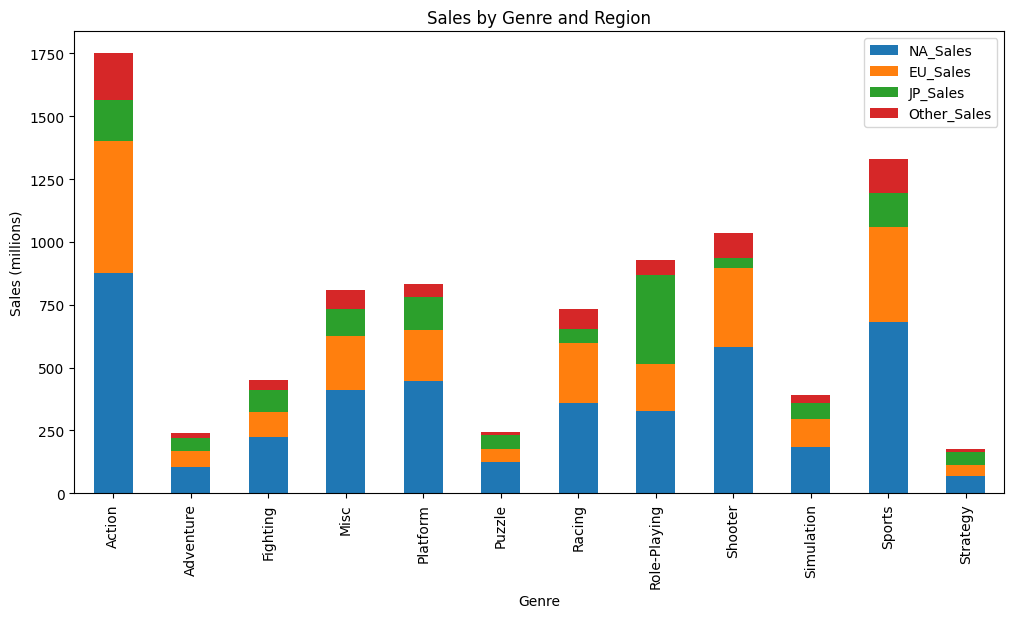

In [83]:
region_genre_sales = df_copy.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()
region_genre_sales.plot(kind="bar", stacked=True, figsize=(12,6), title="Sales by Genre and Region", ylabel="Sales (millions)")
plt.show()

## ✅ Summary
- Highlight key findings obtained from each section.
- Summarize observed patterns and relationships.
- Provide recommendations for next steps (e.g., predictive models, trend analysis, etc.).